# Parametres

In [1]:
FILENAME : str = "../data/316_ideological_book_corpus/ibc.csv"

# Exploration des données

Nombre de lignes dans le dataset :  4326
Taille des phrases en entrée en nombre de caractères — avant prétraitement


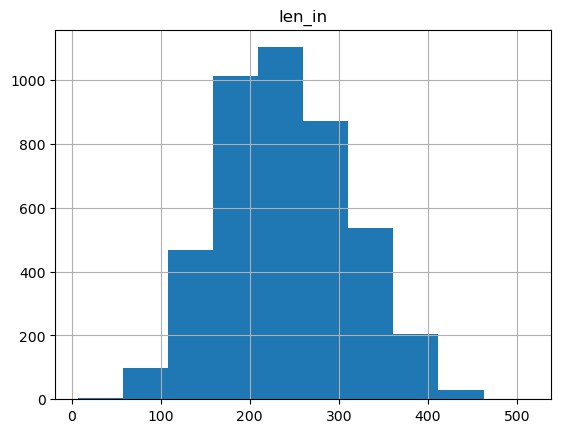

In [16]:
import pandas as pd

df = pd.read_csv(FILENAME).\
        astype({
            "sentence" : "str",
            "leaning" : "str"
        }).\
        rename({
            "sentence" : "in",
            "leaning" : "out"
        }, axis = 1)

df["len_in"] = df["in"].apply(len)
print("Nombre de lignes dans le dataset : ", len(df))
print("Taille des phrases en entrée en nombre de caractères — avant prétraitement")
_ = df.hist("len_in")

In [17]:
LABEL : list[str] = list(set(df["out"]))
ID2LABEL : dict[int:str] = {i : cat for i,cat in enumerate(LABEL)}
LABEL2ID : dict[str:int] = {cat:i for i,cat in enumerate(LABEL)}
print("Categories : " + ", ".join([cat for cat in LABEL]),"\n")

del df

Categories : Liberal, Neutral, Conservative 



# Entraînement d'un classifieur

## Load the dataset

In [39]:
from datasets import load_dataset, DatasetDict

ds_original = load_dataset("csv", data_files = {"whole" :FILENAME})["whole"]
ds_temp = ds_original.train_test_split(test_size = 0.15)
ds_temp2 = ds_temp["train"].train_test_split(train_size = 0.8)

ds = DatasetDict({
    "train" : ds_temp["train"],
    "validation" : ds_temp["test"],
    "test" : ds_temp["test"]
})

del ds_temp, ds_temp2

In [52]:
def proportion(name):
    return int(
        100 * len(ds[name]) / len(ds_original)
    )
print("Répartition des datasets : ")
print(f'|{"Dataset":^15}|{"Taille":^10}|{"Proportion":^10}|')
print("-" * 39)
print(f'|{"Train":^15}|{len(ds["train"]):^10}|{proportion("train"):^10}|')
print(f'|{"Validation":^15}|{len(ds["validation"]):^10}|{proportion("validation"):^10}|')
print(f'|{"Test":^15}|{len(ds["test"]):^10}|{proportion("test"):^10}|')

Répartition des datasets : 
|    Dataset    |  Taille  |Proportion|
---------------------------------------
|     Train     |   3677   |    84    |
|  Validation   |   649    |    15    |
|     Test      |   649    |    15    |


In [36]:
2941 + 736 + 649

4326